In [13]:
import pandas as pd
import numpy as np
import keras
import scipy
from sklearn.model_selection import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *
from sklearn import svm
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, GaussianNoise, LSTM,RepeatVector,Embedding
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
import matplotlib.pyplot as plt


In [14]:
df1_tr = pd.read_csv('data383k_50_50_50_TRAIN.csv')
df1_val = pd.read_csv('data383k_50_50_50_VAL.csv')
df1_test = pd.read_csv('data383k_50_50_50_TEST.csv')
#Train set 
X_train = df1_tr.iloc[:,2:452].values
y_train = df1_tr.iloc[:,0].values

#Val set
X_val = df1_val.iloc[:,2:452].values
y_val = df1_val.iloc[:,0].values

#Test set
X_test = df1_test.iloc[:,2:452].values
y_test = df1_test.iloc[:,0].values


# X_train = X_train.reshape(X_train.shape[0],1, 450)
# X_test = X_test.reshape(X_test.shape[0], 1, 450)
# X_val = X_val.reshape(X_val.shape[0],1, 450)

y_val = np_utils.to_categorical(y_val, 4)
y_test = np_utils.to_categorical(y_test, 4)
y_train = np_utils.to_categorical(y_train, 4)


In [32]:
class FeedForwardNN:
    def __init__(self,input_dim):
        self.history = None
        
        #model
        self.model = Sequential()
        self.model.add(Dense(512, input_dim = input_dim))
        self.model.add(BatchNormalization())
        self.model.add(Activation('relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(4, activation = 'softmax', #change to 1 for binary_crossentropy
                # kernel_initializer = 'TruncatedNormal',
                kernel_regularizer = l2(0.1)))
    
    def train(self, X_train, Y_train,X_test,Y_test,n_epochs = 90):
        self.model.compile(loss = 'categorical_crossentropy',#categorical_crossentropy
                          optimizer = 'adam',
                          metrics = ['accuracy'])
        #cb = [ReduceLROnPlateau(monitor='loss', patience=15, factor = 0.5)]
        cb = [EarlyStopping(monitor = 'val_loss', patience = 90)]
        self.history = self.model.fit(X_train,Y_train,
                                     epochs = n_epochs,
                                     batch_size=32,
                                     verbose = 1,
                                     validation_data = (X_test,Y_test),
                                     callbacks = cb)
    def predict(self, X_test):
        self.predict_labels = self.model.predict(X_test)
        return self.predict_labels
    def plot_history(self):
        plt.figure(1)
        plt.subplot(211)  
        plt.plot(self.history.history['acc'], linewidth = 1.0)  
        plt.plot(self.history.history['val_acc'], linewidth = 1.0)  
        plt.title('Accuracy')  
        plt.ylabel('Accuracy')  
        plt.xlabel('Epoch')  
        plt.legend(['train', 'test'], loc='best') 

        plt.subplot(212)  
        plt.plot(self.history.history['loss'], linewidth = 1.0)  
        plt.plot(self.history.history['val_loss'], linewidth = 1.0)  
        plt.title('Loss')  
        plt.ylabel('Loss')  
        plt.xlabel('Epoch')  
        plt.legend(['train', 'test'], loc='best')  
        plt.show() 

# 1st

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.9360 - acc: 0.5875 - val_loss: 0.9133 - val_acc: 0.5566
Epoch 2/90
270358/270358 [==============================] - 71s 263us/step - loss: 0.8886 - acc: 0.6059 - val_loss: 0.8837 - val_acc: 0.5923
Epoch 3/90
270358/270358 [==============================] - 71s 263us/step - loss: 0.8779 - acc: 0.6104 - val_loss: 0.8744 - val_acc: 0.6039
Epoch 4/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8706 - acc: 0.6132 - val_loss: 0.8767 - val_acc: 0.5930
Epoch 5/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8671 - acc: 0.6135 - val_loss: 0.8885 - val_acc: 0.5789
Epoch 6/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8625 - acc: 0.6162 - val_loss: 0.8975 - val_acc: 0.5572
Epoch 7/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8620 - acc: 0.6157

270358/270358 [==============================] - 72s 265us/step - loss: 0.8429 - acc: 0.6259 - val_loss: 0.8854 - val_acc: 0.5824
Epoch 59/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8407 - acc: 0.6288 - val_loss: 0.8979 - val_acc: 0.5640
Epoch 60/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8406 - acc: 0.6279 - val_loss: 0.8942 - val_acc: 0.5672
Epoch 61/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8425 - acc: 0.6265 - val_loss: 0.8817 - val_acc: 0.5748
Epoch 62/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8416 - acc: 0.6269 - val_loss: 0.8894 - val_acc: 0.5711
Epoch 63/90
270358/270358 [==============================] - 71s 263us/step - loss: 0.8423 - acc: 0.6271 - val_loss: 0.9117 - val_acc: 0.5574
Epoch 64/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8397 - acc: 0.6283 - val_loss: 0.8682 - val_acc: 0.5908
Epoch 65/90
270358

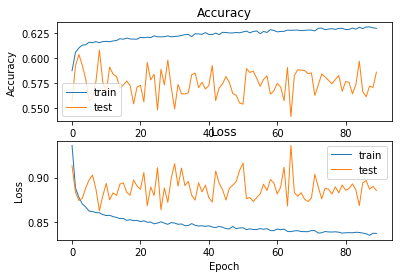

In [33]:
    FF = FeedForwardNN(input_dim = X_train.shape[1])
    FF.train(X_train, y_train,
             X_val, y_val)
    FF.plot_history()

# 2nd

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 72s 267us/step - loss: 0.9376 - acc: 0.5866 - val_loss: 0.8988 - val_acc: 0.5713
Epoch 2/90
270358/270358 [==============================] - 71s 262us/step - loss: 0.8890 - acc: 0.6061 - val_loss: 0.8989 - val_acc: 0.5915
Epoch 3/90
270358/270358 [==============================] - 71s 262us/step - loss: 0.8782 - acc: 0.6090 - val_loss: 0.8764 - val_acc: 0.5969
Epoch 4/90
270358/270358 [==============================] - 71s 263us/step - loss: 0.8713 - acc: 0.6129 - val_loss: 0.8718 - val_acc: 0.5942
Epoch 5/90
270358/270358 [==============================] - 71s 263us/step - loss: 0.8681 - acc: 0.6135 - val_loss: 0.9065 - val_acc: 0.5531
Epoch 6/90
270358/270358 [==============================] - 71s 263us/step - loss: 0.8653 - acc: 0.6141 - val_loss: 0.9155 - val_acc: 0.5425
Epoch 7/90
270358/270358 [==============================] - 71s 263us/step - loss: 0.8624 - acc: 0.6146

270358/270358 [==============================] - 71s 263us/step - loss: 0.8417 - acc: 0.6272 - val_loss: 0.8699 - val_acc: 0.5892
Epoch 59/90
270358/270358 [==============================] - 71s 263us/step - loss: 0.8403 - acc: 0.6287 - val_loss: 0.8810 - val_acc: 0.5819
Epoch 60/90
270358/270358 [==============================] - 71s 263us/step - loss: 0.8414 - acc: 0.6269 - val_loss: 0.8776 - val_acc: 0.5749
Epoch 61/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8422 - acc: 0.6259 - val_loss: 0.8798 - val_acc: 0.5834
Epoch 62/90
270358/270358 [==============================] - 71s 263us/step - loss: 0.8426 - acc: 0.6267 - val_loss: 0.8752 - val_acc: 0.5853
Epoch 63/90
270358/270358 [==============================] - 71s 263us/step - loss: 0.8410 - acc: 0.6277 - val_loss: 0.8792 - val_acc: 0.5801
Epoch 64/90
270358/270358 [==============================] - 71s 263us/step - loss: 0.8421 - acc: 0.6266 - val_loss: 0.8918 - val_acc: 0.5624
Epoch 65/90
270358

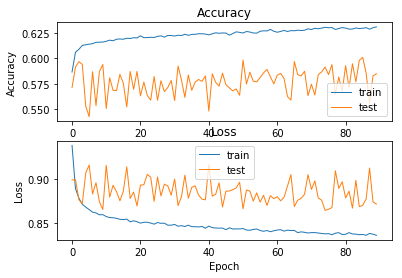

In [34]:
    FF = FeedForwardNN(input_dim = X_train.shape[1])
    FF.train(X_train, y_train,
             X_val, y_val)
    FF.plot_history()

# 3rd

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.9382 - acc: 0.5887 - val_loss: 0.9055 - val_acc: 0.5679
Epoch 2/90
270358/270358 [==============================] - 71s 263us/step - loss: 0.8887 - acc: 0.6069 - val_loss: 0.9167 - val_acc: 0.5606
Epoch 3/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8776 - acc: 0.6118 - val_loss: 0.8933 - val_acc: 0.5778
Epoch 4/90
270358/270358 [==============================] - 71s 263us/step - loss: 0.8716 - acc: 0.6120 - val_loss: 0.8829 - val_acc: 0.5825
Epoch 5/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8669 - acc: 0.6143 - val_loss: 0.8924 - val_acc: 0.5616
Epoch 6/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8643 - acc: 0.6148 - val_loss: 0.8955 - val_acc: 0.5755
Epoch 7/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8623 - acc: 0.6146

270358/270358 [==============================] - 71s 264us/step - loss: 0.8410 - acc: 0.6282 - val_loss: 0.8739 - val_acc: 0.5861
Epoch 59/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8416 - acc: 0.6274 - val_loss: 0.8994 - val_acc: 0.5692
Epoch 60/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8411 - acc: 0.6268 - val_loss: 0.8851 - val_acc: 0.5738
Epoch 61/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8413 - acc: 0.6271 - val_loss: 0.8897 - val_acc: 0.5719
Epoch 62/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8411 - acc: 0.6286 - val_loss: 0.8797 - val_acc: 0.5794
Epoch 63/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8399 - acc: 0.6290 - val_loss: 0.9087 - val_acc: 0.5540
Epoch 64/90
270358/270358 [==============================] - 71s 264us/step - loss: 0.8418 - acc: 0.6279 - val_loss: 0.8802 - val_acc: 0.5809
Epoch 65/90
270358

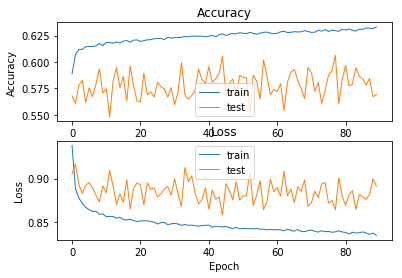

In [35]:
    FF = FeedForwardNN(input_dim = X_train.shape[1])
    FF.train(X_train, y_train,
             X_val, y_val)
    FF.plot_history()

# 4th

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 73s 269us/step - loss: 0.9384 - acc: 0.5861 - val_loss: 0.9325 - val_acc: 0.5486
Epoch 2/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8889 - acc: 0.6048 - val_loss: 0.8862 - val_acc: 0.5794
Epoch 3/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8775 - acc: 0.6116 - val_loss: 0.8851 - val_acc: 0.5835
Epoch 4/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8708 - acc: 0.6144 - val_loss: 0.8754 - val_acc: 0.5918
Epoch 5/90
270358/270358 [==============================] - 72s 266us/step - loss: 0.8682 - acc: 0.6129 - val_loss: 0.8826 - val_acc: 0.5799
Epoch 6/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8659 - acc: 0.6133 - val_loss: 0.8750 - val_acc: 0.5903
Epoch 7/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8632 - acc: 0.6147

270358/270358 [==============================] - 72s 265us/step - loss: 0.8423 - acc: 0.6273 - val_loss: 0.8886 - val_acc: 0.5738
Epoch 59/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8412 - acc: 0.6282 - val_loss: 0.8667 - val_acc: 0.5998
Epoch 60/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8419 - acc: 0.6273 - val_loss: 0.8835 - val_acc: 0.5824
Epoch 61/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8414 - acc: 0.6266 - val_loss: 0.9011 - val_acc: 0.5666
Epoch 62/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8409 - acc: 0.6270 - val_loss: 0.9005 - val_acc: 0.5713
Epoch 63/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8421 - acc: 0.6267 - val_loss: 0.9166 - val_acc: 0.5480
Epoch 64/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8426 - acc: 0.6272 - val_loss: 0.8619 - val_acc: 0.5957
Epoch 65/90
270358

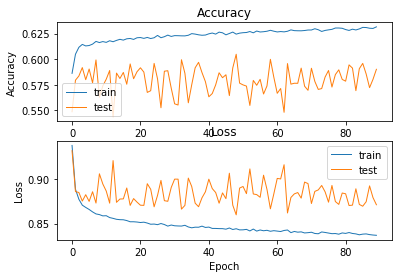

In [36]:
    FF = FeedForwardNN(input_dim = X_train.shape[1])
    FF.train(X_train, y_train,
             X_val, y_val)
    FF.plot_history()

# 5th

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.9379 - acc: 0.5876 - val_loss: 0.8903 - val_acc: 0.5981
Epoch 2/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8894 - acc: 0.6056 - val_loss: 0.8860 - val_acc: 0.5842
Epoch 3/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8787 - acc: 0.6098 - val_loss: 0.8884 - val_acc: 0.5742
Epoch 4/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8713 - acc: 0.6113 - val_loss: 0.9025 - val_acc: 0.5538
Epoch 5/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8661 - acc: 0.6148 - val_loss: 0.8753 - val_acc: 0.5888
Epoch 6/90
270358/270358 [==============================] - 72s 266us/step - loss: 0.8640 - acc: 0.6149 - val_loss: 0.8795 - val_acc: 0.5772
Epoch 7/90
270358/270358 [==============================] - 72s 266us/step - loss: 0.8625 - acc: 0.6157

270358/270358 [==============================] - 72s 266us/step - loss: 0.8412 - acc: 0.6280 - val_loss: 0.8668 - val_acc: 0.5927
Epoch 59/90
270358/270358 [==============================] - 72s 266us/step - loss: 0.8414 - acc: 0.6261 - val_loss: 0.8710 - val_acc: 0.5947
Epoch 60/90
270358/270358 [==============================] - 72s 267us/step - loss: 0.8403 - acc: 0.6273 - val_loss: 0.8711 - val_acc: 0.5964
Epoch 61/90
270358/270358 [==============================] - 72s 265us/step - loss: 0.8415 - acc: 0.6273 - val_loss: 0.8719 - val_acc: 0.5998
Epoch 62/90
270358/270358 [==============================] - 72s 266us/step - loss: 0.8412 - acc: 0.6275 - val_loss: 0.8891 - val_acc: 0.5779
Epoch 63/90
270358/270358 [==============================] - 72s 266us/step - loss: 0.8403 - acc: 0.6282 - val_loss: 0.8817 - val_acc: 0.5812
Epoch 64/90
270358/270358 [==============================] - 73s 268us/step - loss: 0.8427 - acc: 0.6255 - val_loss: 0.8808 - val_acc: 0.5778
Epoch 65/90
270358

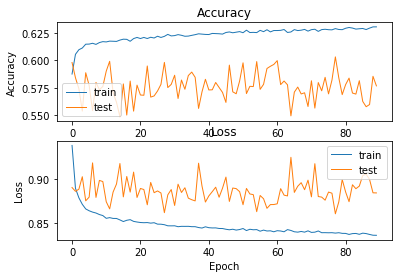

In [37]:
    FF = FeedForwardNN(input_dim = X_train.shape[1])
    FF.train(X_train, y_train,
             X_val, y_val)
    FF.plot_history()

# 6th

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 74s 272us/step - loss: 0.9374 - acc: 0.5871 - val_loss: 0.9061 - val_acc: 0.5552
Epoch 2/90
270358/270358 [==============================] - 72s 267us/step - loss: 0.8896 - acc: 0.6044 - val_loss: 0.8827 - val_acc: 0.6092
Epoch 3/90
270358/270358 [==============================] - 72s 267us/step - loss: 0.8789 - acc: 0.6090 - val_loss: 0.8855 - val_acc: 0.5803
Epoch 4/90
270358/270358 [==============================] - 72s 267us/step - loss: 0.8710 - acc: 0.6135 - val_loss: 0.8916 - val_acc: 0.5662
Epoch 5/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8672 - acc: 0.6138 - val_loss: 0.8954 - val_acc: 0.5719
Epoch 6/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8650 - acc: 0.6139 - val_loss: 0.9041 - val_acc: 0.5621
Epoch 7/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8620 - acc: 0.6160

270358/270358 [==============================] - 72s 267us/step - loss: 0.8401 - acc: 0.6297 - val_loss: 0.8751 - val_acc: 0.5901
Epoch 59/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8389 - acc: 0.6287 - val_loss: 0.8836 - val_acc: 0.5743
Epoch 60/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8421 - acc: 0.6262 - val_loss: 0.8674 - val_acc: 0.5940
Epoch 61/90
270358/270358 [==============================] - 73s 268us/step - loss: 0.8404 - acc: 0.6292 - val_loss: 0.8905 - val_acc: 0.5712
Epoch 62/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8413 - acc: 0.6275 - val_loss: 0.8665 - val_acc: 0.5963
Epoch 63/90
270358/270358 [==============================] - 72s 267us/step - loss: 0.8386 - acc: 0.6298 - val_loss: 0.8998 - val_acc: 0.5625
Epoch 64/90
270358/270358 [==============================] - 72s 267us/step - loss: 0.8402 - acc: 0.6288 - val_loss: 0.9010 - val_acc: 0.5694
Epoch 65/90
270358

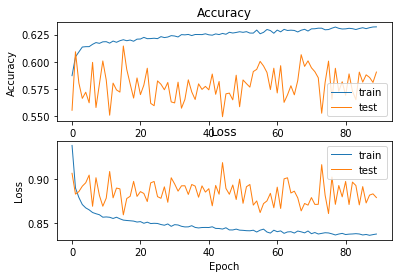

In [38]:
    FF = FeedForwardNN(input_dim = X_train.shape[1])
    FF.train(X_train, y_train,
             X_val, y_val)
    FF.plot_history()

# 7th

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 74s 272us/step - loss: 0.9375 - acc: 0.5881 - val_loss: 0.9109 - val_acc: 0.5847
Epoch 2/90
270358/270358 [==============================] - 72s 267us/step - loss: 0.8891 - acc: 0.6053 - val_loss: 0.8812 - val_acc: 0.5841
Epoch 3/90
270358/270358 [==============================] - 72s 266us/step - loss: 0.8784 - acc: 0.6107 - val_loss: 0.9111 - val_acc: 0.5597
Epoch 4/90
270358/270358 [==============================] - 72s 266us/step - loss: 0.8714 - acc: 0.6122 - val_loss: 0.8920 - val_acc: 0.5634
Epoch 5/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8667 - acc: 0.6140 - val_loss: 0.8889 - val_acc: 0.5695
Epoch 6/90
270358/270358 [==============================] - 72s 267us/step - loss: 0.8643 - acc: 0.6147 - val_loss: 0.8831 - val_acc: 0.5736
Epoch 7/90
270358/270358 [==============================] - 72s 267us/step - loss: 0.8622 - acc: 0.6160

270358/270358 [==============================] - 72s 268us/step - loss: 0.8424 - acc: 0.6272 - val_loss: 0.8780 - val_acc: 0.5810
Epoch 59/90
270358/270358 [==============================] - 72s 267us/step - loss: 0.8432 - acc: 0.6262 - val_loss: 0.8777 - val_acc: 0.5813
Epoch 60/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8417 - acc: 0.6262 - val_loss: 0.9222 - val_acc: 0.5456
Epoch 61/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8412 - acc: 0.6285 - val_loss: 0.8869 - val_acc: 0.5766
Epoch 62/90
270358/270358 [==============================] - 72s 267us/step - loss: 0.8413 - acc: 0.6272 - val_loss: 0.8799 - val_acc: 0.5764
Epoch 63/90
270358/270358 [==============================] - 72s 267us/step - loss: 0.8417 - acc: 0.6278 - val_loss: 0.8692 - val_acc: 0.5922
Epoch 64/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8396 - acc: 0.6276 - val_loss: 0.8934 - val_acc: 0.5664
Epoch 65/90
270358

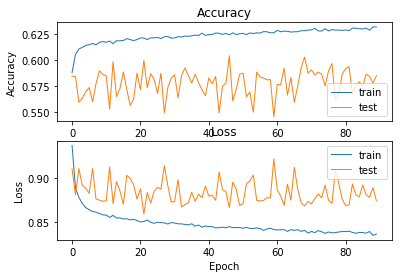

In [39]:
    FF = FeedForwardNN(input_dim = X_train.shape[1])
    FF.train(X_train, y_train,
             X_val, y_val)
    FF.plot_history()

# 8th

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 74s 273us/step - loss: 0.9367 - acc: 0.5888 - val_loss: 0.8954 - val_acc: 0.5836
Epoch 2/90
270358/270358 [==============================] - 72s 267us/step - loss: 0.8898 - acc: 0.6063 - val_loss: 0.9007 - val_acc: 0.5955
Epoch 3/90
270358/270358 [==============================] - 72s 267us/step - loss: 0.8791 - acc: 0.6098 - val_loss: 0.8757 - val_acc: 0.5983
Epoch 4/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8718 - acc: 0.6128 - val_loss: 0.8945 - val_acc: 0.5676
Epoch 5/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8678 - acc: 0.6141 - val_loss: 0.9076 - val_acc: 0.5540
Epoch 6/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8650 - acc: 0.6143 - val_loss: 0.9013 - val_acc: 0.5612
Epoch 7/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8635 - acc: 0.6143

270358/270358 [==============================] - 72s 268us/step - loss: 0.8417 - acc: 0.6269 - val_loss: 0.9004 - val_acc: 0.5592
Epoch 59/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8407 - acc: 0.6274 - val_loss: 0.8708 - val_acc: 0.5937
Epoch 60/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8403 - acc: 0.6282 - val_loss: 0.8769 - val_acc: 0.5870
Epoch 61/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8412 - acc: 0.6276 - val_loss: 0.8857 - val_acc: 0.5839
Epoch 62/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8414 - acc: 0.6277 - val_loss: 0.8756 - val_acc: 0.5879
Epoch 63/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8410 - acc: 0.6280 - val_loss: 0.8588 - val_acc: 0.5968
Epoch 64/90
270358/270358 [==============================] - 72s 268us/step - loss: 0.8401 - acc: 0.6277 - val_loss: 0.8914 - val_acc: 0.5728
Epoch 65/90
270358

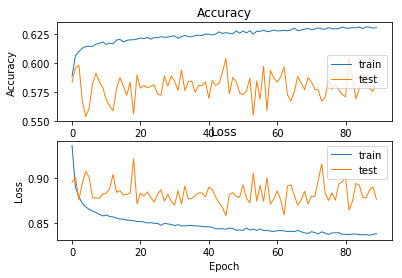

In [40]:
    FF = FeedForwardNN(input_dim = X_train.shape[1])
    FF.train(X_train, y_train,
             X_val, y_val)
    FF.plot_history()

# 9th

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 74s 275us/step - loss: 0.9378 - acc: 0.5875 - val_loss: 0.8907 - val_acc: 0.5903
Epoch 2/90
270358/270358 [==============================] - 73s 269us/step - loss: 0.8899 - acc: 0.6045 - val_loss: 0.8973 - val_acc: 0.5806
Epoch 3/90
270358/270358 [==============================] - 73s 268us/step - loss: 0.8780 - acc: 0.6105 - val_loss: 0.8849 - val_acc: 0.5814
Epoch 4/90
270358/270358 [==============================] - 73s 269us/step - loss: 0.8710 - acc: 0.6133 - val_loss: 0.8765 - val_acc: 0.5917
Epoch 5/90
270358/270358 [==============================] - 73s 269us/step - loss: 0.8681 - acc: 0.6135 - val_loss: 0.8798 - val_acc: 0.5895
Epoch 6/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.8641 - acc: 0.6162 - val_loss: 0.8806 - val_acc: 0.5821
Epoch 7/90
270358/270358 [==============================] - 73s 269us/step - loss: 0.8626 - acc: 0.6145

270358/270358 [==============================] - 73s 269us/step - loss: 0.8425 - acc: 0.6263 - val_loss: 0.8887 - val_acc: 0.5746
Epoch 59/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.8418 - acc: 0.6273 - val_loss: 0.9055 - val_acc: 0.5518
Epoch 60/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.8403 - acc: 0.6277 - val_loss: 0.8740 - val_acc: 0.5908
Epoch 61/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.8425 - acc: 0.6276 - val_loss: 0.9076 - val_acc: 0.5662
Epoch 62/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.8408 - acc: 0.6276 - val_loss: 0.8825 - val_acc: 0.5744
Epoch 63/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.8406 - acc: 0.6274 - val_loss: 0.8669 - val_acc: 0.5944
Epoch 64/90
270358/270358 [==============================] - 73s 269us/step - loss: 0.8399 - acc: 0.6278 - val_loss: 0.8995 - val_acc: 0.5655
Epoch 65/90
270358

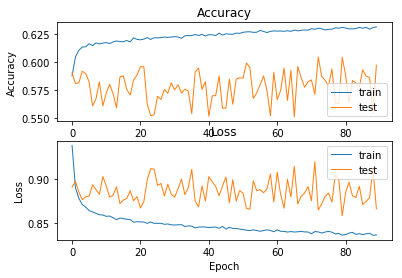

In [41]:
    FF = FeedForwardNN(input_dim = X_train.shape[1])
    FF.train(X_train, y_train,
             X_val, y_val)
    FF.plot_history()

# 10th

Train on 270358 samples, validate on 57934 samples
Epoch 1/90
270358/270358 [==============================] - 75s 276us/step - loss: 0.9376 - acc: 0.5865 - val_loss: 0.8942 - val_acc: 0.5842
Epoch 2/90
270358/270358 [==============================] - 73s 269us/step - loss: 0.8904 - acc: 0.6054 - val_loss: 0.8963 - val_acc: 0.5782
Epoch 3/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.8779 - acc: 0.6103 - val_loss: 0.8806 - val_acc: 0.5784
Epoch 4/90
270358/270358 [==============================] - 73s 269us/step - loss: 0.8723 - acc: 0.6119 - val_loss: 0.8857 - val_acc: 0.5711
Epoch 5/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.8678 - acc: 0.6145 - val_loss: 0.9097 - val_acc: 0.5517
Epoch 6/90
270358/270358 [==============================] - 73s 269us/step - loss: 0.8653 - acc: 0.6150 - val_loss: 0.8842 - val_acc: 0.5846
Epoch 7/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.8630 - acc: 0.6152

270358/270358 [==============================] - 73s 270us/step - loss: 0.8414 - acc: 0.6287 - val_loss: 0.8970 - val_acc: 0.5738
Epoch 59/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.8409 - acc: 0.6279 - val_loss: 0.8921 - val_acc: 0.5627
Epoch 60/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.8415 - acc: 0.6274 - val_loss: 0.8814 - val_acc: 0.5860
Epoch 61/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.8414 - acc: 0.6264 - val_loss: 0.8800 - val_acc: 0.5845
Epoch 62/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.8398 - acc: 0.6278 - val_loss: 0.8821 - val_acc: 0.5812
Epoch 63/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.8400 - acc: 0.6281 - val_loss: 0.9011 - val_acc: 0.5621
Epoch 64/90
270358/270358 [==============================] - 73s 270us/step - loss: 0.8402 - acc: 0.6289 - val_loss: 0.8896 - val_acc: 0.5731
Epoch 65/90
270358

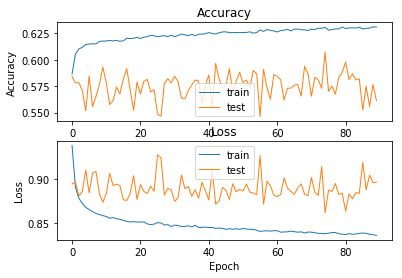

In [42]:
    FF = FeedForwardNN(input_dim = X_train.shape[1])
    FF.train(X_train, y_train,
             X_val, y_val)
    FF.plot_history()